In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Projects/ML/MLAll/Diabetes.csv")

In [5]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
df.describe(include='all')

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [10]:
df.shape

(768, 9)

In [11]:
(df['Glucose'].isnull().sum()/df['Glucose'].shape[0])*100

np.float64(0.6510416666666667)

- Glucose column has 0.65% of missing values. So, we can replace the null values with some techniques.

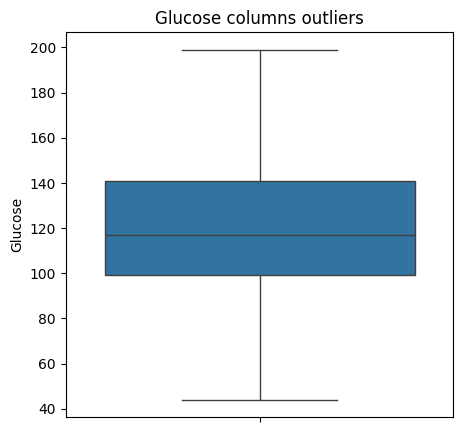

In [12]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=df['Glucose'],ax=ax)
plt.title("Glucose columns outliers")
plt.show()

- In Glucose column, we are not having any outliers so we can replace the null values with measure of central tendency methods like.
- Mean
- Median
- Mode

## Fillna() :-

In [13]:
df['Glucose_new']=df['Glucose'].fillna(df['Glucose'].median())

In [14]:
df['Glucose_new'].isnull().sum()

np.int64(0)

## Replace() :-

In [15]:
df['Glucose_new1']=df['Glucose'].replace(to_replace=np.nan,value=df['Glucose'].median())

In [16]:
df['Glucose_new1'].isnull().sum()

np.int64(0)

## Interpolation() :-

In [17]:
df['Glucose_new2']=df['Glucose'].interpolate()

In [18]:
df['Glucose_new2'].isnull().sum()

np.int64(0)

## Nan_to_num() :-

In [19]:
df['Glucose_new_nan']=np.nan_to_num(df['Glucose'],nan=df['Glucose'].median())

In [20]:
df['Glucose_new_nan'].isnull().sum()

np.int64(0)

## SimpleImputer() :-

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['Glucose_imputer'] = imputer.fit_transform(df[['Glucose']])

In [23]:
df['Glucose_imputer'].isnull().sum()

np.int64(0)